<a href="https://colab.research.google.com/github/junaidkhan37/AmazonCouponReasearch/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [7]:
pd.set_option('display.max_column', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
data.count()


,0
destination,12684
passanger,12684
weather,12684
temperature,12684
time,12684
coupon,12684
expiration,12684
gender,12684
age,12684
maritalStatus,12684


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# 1. Check how many missing values each column has
missing_vals = data.isnull().sum()
print("Missing values per column:\n")
print(missing_vals)

# 2. Decide what to do:
# - 'car' has many missing values (almost all) → drop
# - Frequency columns (Bar, CoffeeHouse, etc.) have few missing values → replace with 'never'
# - Other columns have no missing values → keep as is

# Drop 'car' column due to excessive missing data
data.drop(columns=['car'], inplace=True)

# Fill missing values in frequency-based columns with 'never'
freq_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[freq_cols] = data[freq_cols].fillna('never')

# 3. Verify that there are no missing values left
print("\nMissing values after cleaning:\n")
print(data.isnull().sum())

# 4. (Optional) Confirm cleaned data shape
print(f"\n✅ Cleaned DataFrame shape: {data.shape}")



Missing values per column:

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Missing values after cleaning:

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon          

4. What proportion of the total observations chose to accept the coupon?



In [9]:
# Calculate the proportion of people who accepted the coupon
acceptance_rate = data['Y'].mean()

print(f"Proportion of observations that accepted the coupon: {acceptance_rate:.2f}")

Proportion of observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

/tmp/ipython-input-3091962214.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='coupon', data=data, order=data['coupon'].value_counts().index, palette='Set2')


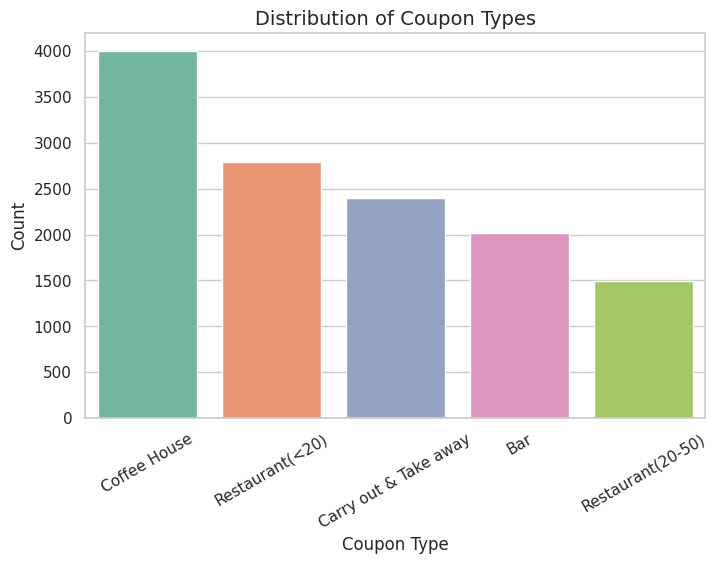

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8,5))
sns.countplot(x='coupon', data=data, order=data['coupon'].value_counts().index, palette='Set2')

# Add titles and labels
plt.title('Distribution of Coupon Types', fontsize=14)
plt.xlabel('Coupon Type')
plt.ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=30)

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

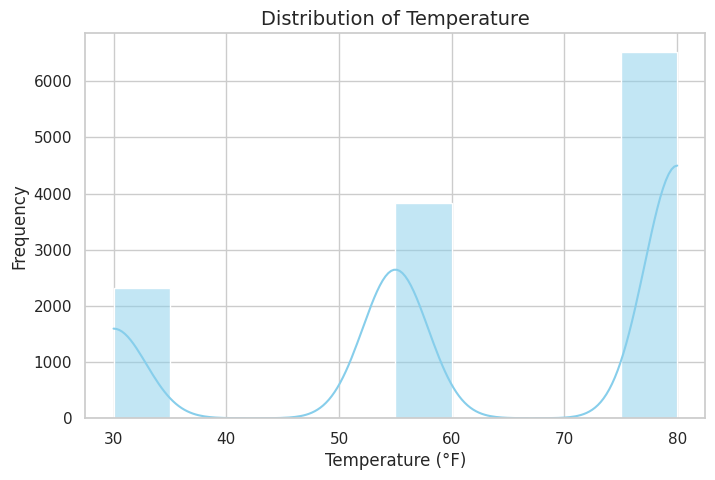

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(8,5))
sns.histplot(data['temperature'], bins=10, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Temperature', fontsize=14)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
# Create a new DataFrame that only contains rows where the coupon type is 'Bar'
bar_coupons = data[data['coupon'] == 'Bar']

# Display the first few rows to confirm
bar_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [13]:
# Calculate the proportion of accepted bar coupons
bar_acceptance_rate = bar_coupons['Y'].mean() * 100

# Display as a formatted percentage
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2f}%")



Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
# Group 1: People who go to a bar 3 or fewer times a month
bar_3_or_less = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]

# Group 2: People who go to a bar more than 3 times a month
bar_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates
accept_rate_3_or_less = bar_3_or_less['Y'].mean() * 100
accept_rate_more_than_3 = bar_more_than_3['Y'].mean() * 100

# Display the results
print(f"Acceptance rate (3 or fewer bar visits/month): {accept_rate_3_or_less:.2f}%")
print(f"Acceptance rate (more than 3 bar visits/month): {accept_rate_more_than_3:.2f}%")


Acceptance rate (3 or fewer bar visits/month): 37.07%
Acceptance rate (more than 3 bar visits/month): 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
# Filter group: drivers who go to a bar more than once a month AND are over 25
bar_age_group = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~bar_coupons['age'].isin(['below21', '21', '21-25']))
]

# All other drivers
other_drivers = bar_coupons.drop(bar_age_group.index)

# Calculate acceptance rates
accept_bar_age = bar_age_group['Y'].mean() * 100
accept_others = other_drivers['Y'].mean() * 100

# Display results
print(f"Acceptance rate (go to bar >1x/month & age >25): {accept_bar_age:.2f}%")
print(f"Acceptance rate (all others): {accept_others:.2f}%")


Acceptance rate (go to bar >1x/month & age >25): 69.52%
Acceptance rate (all others): 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [16]:
# Filter: go to bar >1x/month, passenger is NOT 'Kid(s)', and occupation is NOT 'Farming, Fishing & Forestry'
group_bar_passenger_occ = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['occupation'] != 'Farming, Fishing & Forestry')
]

# All others
other_group = bar_coupons.drop(group_bar_passenger_occ.index)

# Calculate acceptance rates
accept_target = group_bar_passenger_occ['Y'].mean() * 100
accept_others = other_group['Y'].mean() * 100

# Print comparison
print(f"Acceptance rate (Bar >1x/month, No kids, Non-farming jobs): {accept_target:.2f}%")
print(f"Acceptance rate (All others): {accept_others:.2f}%")


Acceptance rate (Bar >1x/month, No kids, Non-farming jobs): 71.32%
Acceptance rate (All others): 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [17]:
# Group 1: Go to bars >1x/month, passengers not kids, and not widowed
group1 = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (data['passanger'] != 'Kid(s)') &
    (data['maritalStatus'] != 'Widowed')
]

# Group 2: Go to bars >1x/month AND age < 30
group2 = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (data['age'].isin(['below21', '21', '21-25', '26-30']))  # ages under 30
]

# Group 3: Go to cheap restaurants (>4 times a month) AND income < 50K
group3 = data[
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (data['income'].isin(['$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]

# Calculate acceptance rates
accept_rate_g1 = group1['Y'].mean() * 100
accept_rate_g2 = group2['Y'].mean() * 100
accept_rate_g3 = group3['Y'].mean() * 100

# Display results
print(f"Acceptance rate Group 1: {accept_rate_g1:.2f}%")
print(f"Acceptance rate Group 2: {accept_rate_g2:.2f}%")
print(f"Acceptance rate Group 3: {accept_rate_g3:.2f}%")


Acceptance rate Group 1: 62.31%
Acceptance rate Group 2: 62.36%
Acceptance rate Group 3: 59.40%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Hypothesis on Drivers Who Accepted Bar Coupons**


Drivers who accepted bar coupons are more likely to have certain behavioral and demographic patterns:
They visit bars more frequently (more than once a month), indicating familiarity and comfort with bar environments.
They are less likely to have minors as passengers, suggesting that the absence of children reduces barriers to accepting a bar-related coupon.
They are younger or middle-aged adults rather than seniors or widowed individuals, implying that social and lifestyle factors may influence acceptance.
Their occupation and income levels are diverse, but drivers with non-farming occupations and moderate incomes tend to accept coupons slightly more, possibly reflecting discretionary spending habits.
Overall, acceptance appears to be driven more by behavioral tendencies and situational context (frequency of bar visits, passenger type) than by gender or education level.
In summary, we hypothesize that frequent bar-goers without children in the car, and who are socially active adults, are the most likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [18]:
# Filter data for Coffee House coupons
coffee_coupons = data[data['coupon'] == 'Coffee House']

# Check the first few rows
coffee_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0


Filtering the dataset for the Coffee house coupon.
Since we've worked on the bar coupon analysis well, now we can apply the same approach to another coupon type, for example, Coffee house coupons. I will explain which passenger type is more likely to accept these coupons.

In this code cell we've filtered the dataset for Coffee house coupons as filtered data for Coffee house coupons and checked the first few rows of this dataset.

In [19]:
# Proportion of accepted coffee house coupons
coffee_accept_rate = coffee_coupons['Y'].mean() * 100
print(f"Overall acceptance rate for Coffee House coupons: {coffee_accept_rate:.2f}%")


Overall acceptance rate for Coffee House coupons: 49.92%


Calculating overall acceptance rate of Coffee house coupons

In this code cell we've checked the proportion of the accepted Coffee house coupon to see the different areas or portions of acceptance but the overall acceptance rate for Coffee house coupons is 49.92%

In [20]:
# Group by passenger type and calculate mean acceptance
passenger_accept = coffee_coupons.groupby('passanger')['Y'].mean() * 100

# Display results
print(passenger_accept)


passanger
Alone        43.794326
Friend(s)    59.690554
Kid(s)       48.309179
Partner      57.049180
Name: Y, dtype: float64


Comparing acceptance rates by passenger type

In this code cell we've checked the group by passenger type as if the passenger is Alone, Kids, Friends or Partner. And calculated the mean acceptance which shows if the passenger is a friend(s) would have the highest chances of accepting coupons for Coffee house with 59.69% then the Partner with 57.04% then the Kids with 48.30% and at last it's the driver Alone with 43.79%

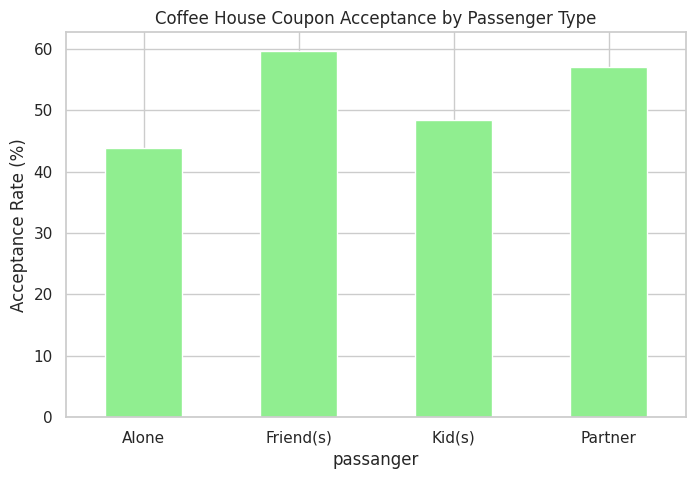

In [21]:
import matplotlib.pyplot as plt

# Bar plot for acceptance rate by passenger type
plt.figure(figsize=(8,5))
passenger_accept.plot(kind='bar', color='lightgreen')
plt.ylabel('Acceptance Rate (%)')
plt.title('Coffee House Coupon Acceptance by Passenger Type')
plt.xticks(rotation=0)
plt.show()


Visualizing the acceptance rate by passenger type

This is the bar plot for acceptance rate by passenger type which tells the passenger type Friend has the highest acceptance rate with almost 60% then the Partner the Kids and at last it's Alone passenger

In [23]:
# Drivers with kids
kids = coffee_coupons[coffee_coupons['passanger'] == 'Kid(s)']
accept_kids = kids['Y'].mean() * 100

# Drivers without kids
no_kids = coffee_coupons[coffee_coupons['passanger'] != 'Kid(s)']
accept_no_kids = no_kids['Y'].mean() * 100

print(f"Acceptance rate with kids: {accept_kids:.2f}%")
print(f"Acceptance rate without kids: {accept_no_kids:.2f}%")


Acceptance rate with kids: 48.31%
Acceptance rate without kids: 50.01%


Compare specific groups

We should compare different group of drivers and we compared drivers with kids and drivers without kids.
The acceptance rate of drivers with kids are 48.31%
The acceptance rate of drivers without kids are 50.01%